<a href="https://colab.research.google.com/github/MisraSerenayy/AIProgramming_GROUPExercise/blob/main/VirgilioDiaz_MisraOzgokGenc_LenaNtagkouli_AI_PROGRAMMINGexercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
metadata = pd.read_csv("/content/Building_Permits_S.csv", index_col=0, quoting=3, on_bad_lines='skip')
metadata.head()

<ipython-input-3-b10b43a29b85>:1: DtypeWarning: Columns (23,28,30,35,37,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("/content/Building_Permits_S.csv", index_col=0, quoting=3, on_bad_lines='skip')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Primary Address Flag,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Point Source,Record ID,data_as_of,data_loaded_at,Days_to_Issue
0,M871747,8,otc alterations permit,2018-01-02,6511,028,1141,NaN,Dolores,St,...,Y,8.0,Mission,94110.0,POINT (-122.424654995 37.751101131),eas_address_point,1.492192e+12,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,0.0
2,201801027679,8,otc alterations permit,2018-01-02,0080,031,101,NaN,Lombard,St,...,Y,3.0,Financial District/South Beach,94111.0,POINT (-122.404078374 37.803468742),eas_address_point,1.492210e+11,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,0.0
3,201801027692,8,otc alterations permit,2018-01-02,1848,046,1420,NaN,06th,Av,...,Y,7.0,Inner Sunset,94122.0,POINT (-122.462613314 37.761912538),eas_address_point,1.492221e+12,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,0.0
5,201801027701,8,otc alterations permit,2018-01-02,1209,030,1837,NaN,Hayes,St,...,Y,5.0,Lone Mountain/USF,94117.0,POINT (-122.446777595 37.77361924),eas_address_point,1.492309e+11,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,0.0
6,201801027717,8,otc alterations permit,2018-01-02,7555,101,305,NaN,Arbor,St,...,Y,8.0,Glen Park,94131.0,POINT (-122.438407251 37.737605376),eas_address_point,1.492258e+12,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,273.0


In [ ]:
target = "Days_to_Issue"
feature = "Existing Construction Type"
feature2= "Permit Type"
feature3= "Estimated Cost"
feature4="Revised Cost"
feature5= "Plansets"

In [ ]:
metadata['Permit Creation Date'] = pd.to_datetime(metadata['Permit Creation Date'])

In [ ]:
metadata['Permit Creation Date'].apply(lambda x: x.weekday())

,Permit Creation Date
0,1
2,1
3,1
5,1
6,1
...,...
79991,1
79994,1
79995,1
79997,1


In [ ]:
metadata[target].isna().sum()

2117

In [ ]:
metadata1= metadata[metadata[target].isna()==False]

In [ ]:
metadata[feature].isna().sum()

18741

In [ ]:
metadata[feature].value_counts()

,count
Existing Construction Type,
5.0,22993
1.0,2677
3.0,967
2.0,338
4.0,88


In [ ]:
metadata[feature].fillna(0, inplace=True)

<ipython-input-25-290a5310925b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metadata[feature].fillna(0, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
# note, the parameter is called test_size, but in fact it refers to validation set. This might be confusing
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2,
                                                      random_state=42, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression
features= [feature, feature2, feature3, feature4, feature5]
reg = LinearRegression().fit(X_train[features], Y_train)
score= reg.score(X_valid[features], Y_valid)
res= reg.predict(X_valid[features])
print(res.min(), res.max())
print("SCORE: {}".format(score))

-53.88170320269728 1039.545730359086
SCORE: 0.3451487048105827


<Axes: xlabel='Zipcode', ylabel='Days_to_Issue'>

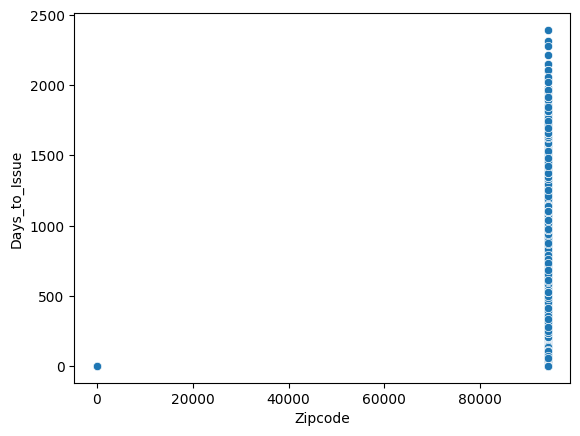

In [ ]:
sns.scatterplot(x = X["Zipcode"], y = Y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the target and features
target = "Days_to_Issue"
features = ["Existing Construction Type", "Permit Creation Date", "Permit Type", "Estimated Cost", "Revised Cost", "Plansets"]

# Scale the features to standardize their ranges
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_valid_scaled = scaler.transform(X_valid[features])

# Train the Linear Regression model
reg = LinearRegression().fit(X_train_scaled, Y_train)

# Evaluate the model
score = reg.score(X_valid_scaled, Y_valid)
res = reg.predict(X_valid_scaled)

# Replace negative predictions with 0 (if Days_to_Issue cannot be negative)
res = np.maximum(res, 0)

# Print results

print(res.min(), res.max())
print("SCORE: {}".format(score))


ValueError: could not convert string to float: '2018-12-13'

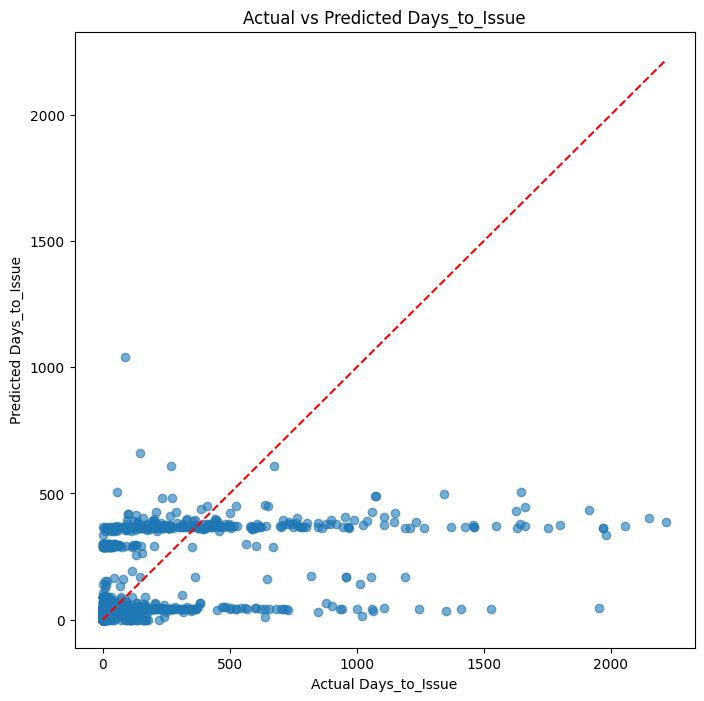

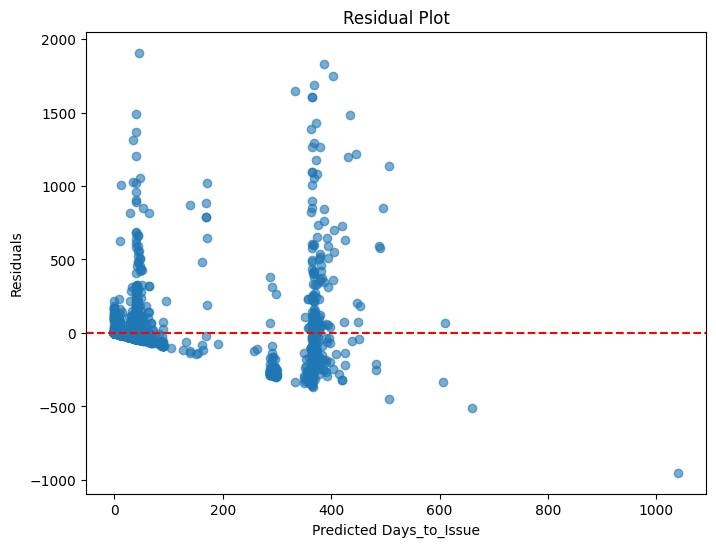

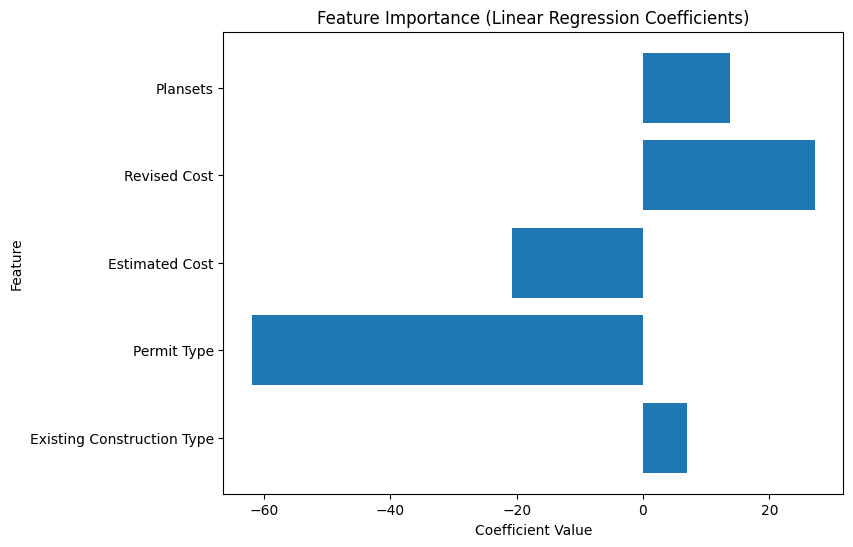

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for improved visuals

# 1. Actual vs. Predicted Plot
plt.figure(figsize=(8, 8))
plt.scatter(Y_valid, res, alpha=0.6)
plt.plot([Y_valid.min(), Y_valid.max()], [Y_valid.min(), Y_valid.max()], 'r--')  # Ideal line
plt.xlabel("Actual Days_to_Issue")
plt.ylabel("Predicted Days_to_Issue")
plt.title("Actual vs Predicted Days_to_Issue")
plt.show()

# 2. Residual Plot
residuals = Y_valid - res
plt.figure(figsize=(8, 6))
plt.scatter(res, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Days_to_Issue")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 3. Feature Coefficients (Linear Regression)
if hasattr(reg, 'coef_'):
    plt.figure(figsize=(8, 6))
    feature_names = features
    coefficients = reg.coef_
    plt.barh(feature_names, coefficients)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title("Feature Importance (Linear Regression Coefficients)")
    plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')

PolynomialFeatures()

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
feature2 = np.arange(6).reshape(3, 2)
feature2
poly = PolynomialFeatures(2)
poly.fit_transform(feature2)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
# Handle NaN values in the target column
data = data[['Permit Type', 'Street Number', 'Days_to_Issue']].dropna()

# Select features and target
X = data[['Permit Type', 'Street Number']]
y = data['Days_to_Issue']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Adjust the degree if needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display predictions alongside actual values
import pandas as pd
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


Mean Squared Error: 17999.227326185028
       Actual  Predicted
10993     0.0  19.146302
13081     0.0  17.971399
40735     2.0  17.595480
42919     0.0  22.611515
15537     0.0  17.654770


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset (adjust file path if needed)
file_path = '/content/Building_Permits_S.csv'  # For Google Colab, after uploading the file
data = pd.read_csv(file_path)

# Handle NaN values by dropping rows with missing values in relevant columns
data = data[['Permit Type', 'Street Number', 'Days_to_Issue']].dropna()

# Select features (X) and target (y)
X = data[['Permit Type', 'Street Number']]
y = data['Days_to_Issue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # Adjust the degree if needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display predictions alongside actual values
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())



<ipython-input-3-cb5d35c18864>:10: DtypeWarning: Columns (23,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Mean Squared Error: 17999.227326185028
   Actual  Predicted
0     0.0  19.146302
1     0.0  17.971399
2     2.0  17.595480
3     0.0  22.611515
4     0.0  17.654770


<ipython-input-6-b6817f888f6e>:12: DtypeWarning: Columns (23,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Training R² Score: 0.31519924872390837
Testing R² Score: 0.29599391848201906
Mean Squared Error: 17999.227326185028


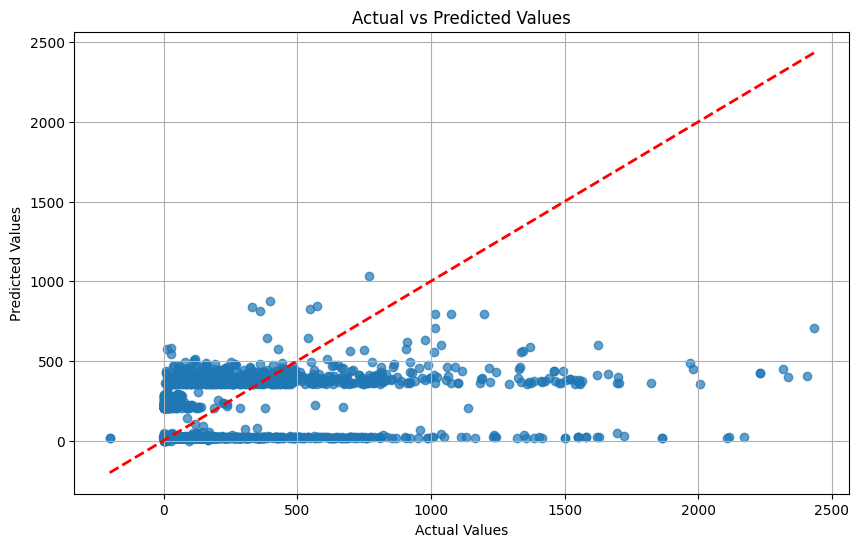

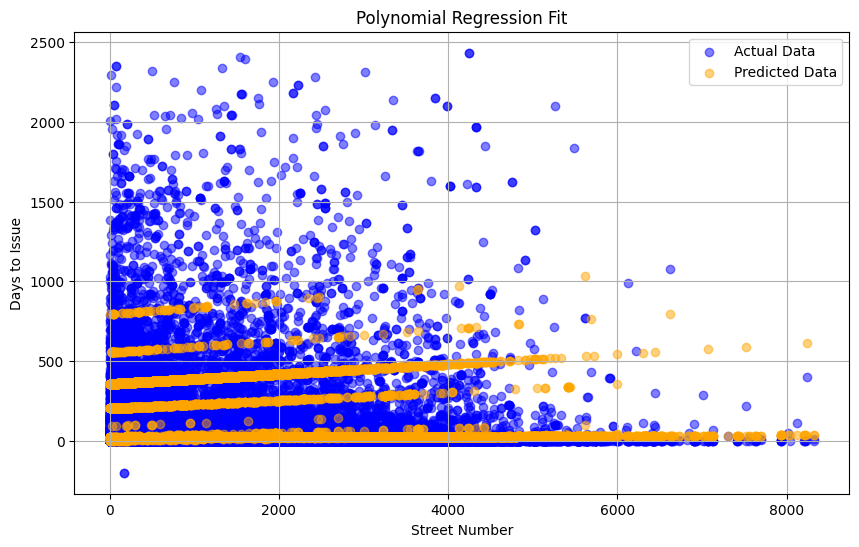

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (adjust file path if needed)
file_path = '/content/Building_Permits_S.csv'  # For Google Colab, after uploading the file
data = pd.read_csv(file_path)

# Handle NaN values by dropping rows with missing values in relevant columns
data = data[['Permit Type', 'Street Number', 'Days_to_Issue']].dropna()

# Select features (X) and target (y)
X = data[['Permit Type', 'Street Number']]
y = data['Days_to_Issue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # Adjust the degree if needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print(f"Training R² Score: {train_score}")
print(f"Testing R² Score: {test_score}")
print(f"Mean Squared Error: {mse}")

# Plot Actual vs Predicted for the Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Visualize the Polynomial Regression Process
plt.figure(figsize=(10, 6))
plt.scatter(X['Street Number'], y, color='blue', label='Actual Data', alpha=0.5)
plt.scatter(X['Street Number'], model.predict(poly.fit_transform(X)), color='orange', label='Predicted Data', alpha=0.5)
plt.title('Polynomial Regression Fit')
plt.xlabel('Street Number')
plt.ylabel('Days to Issue')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# DecisionTreeClassifier for classification

model = DecisionTreeRegressor().fit(X, Y)
print("Score: {}".format(model.score(X, Y)))

NameError: name 'Y' is not defined